In [1]:
import numpy as np
import itertools as it
from fractions import Fraction
import matplotlib.pyplot as plt

In [2]:
S = list(it.product([0,1],[0,1]))

## Utility function of Anna pappa's battle of sex CHSH hybrid

In [3]:
# payoff function
def u(x,y):
    x1, x2, y1, y2 = x[0], x[1], y[0], y[1]
    t = x1&x2
    if t == y1^y2:
        return{0:(1, 1/2), 1:(1/2,1)}[y1] if t == 0 else (3/4, 3/4)
    else:
        return (0,0)

In [4]:
# payoff printing fuction
def prpff(u):
    S = list(it.product([0,1],[0,1]))
    print('y      :  payoff')
    for x in S:
        if x[0]&x[1] == 0:
            print('\n x1^x2 = 0')
            for y in S:
                    print(y,':', u(x,y))
        else: 
            print('\n x1^x2 = 1')
            for y in S:
                    print(y,':', u(x,y))

In [5]:
prpff(u)

y      :  payoff

 x1^x2 = 0
(0, 0) : (1, 0.5)
(0, 1) : (0, 0)
(1, 0) : (0, 0)
(1, 1) : (0.5, 1)

 x1^x2 = 0
(0, 0) : (1, 0.5)
(0, 1) : (0, 0)
(1, 0) : (0, 0)
(1, 1) : (0.5, 1)

 x1^x2 = 0
(0, 0) : (1, 0.5)
(0, 1) : (0, 0)
(1, 0) : (0, 0)
(1, 1) : (0.5, 1)

 x1^x2 = 1
(0, 0) : (0, 0)
(0, 1) : (0.75, 0.75)
(1, 0) : (0.75, 0.75)
(1, 1) : (0, 0)


## Classical

In [6]:
px = [1/4]*4
pxy = [1, 1, ]
def pyx(x,y):
    x1, x2, y1, y2 = x[0], x[1], y[0], y[1]
    if x1&x2 == 0:
        return 1 if y == (0,0) else 0
    else:
        return 1 if y == (1,0) else 0

def F(X, px, Y, pyx, u):
    f1, f2 = 0, 0
    for x in X:
        i = x[1]*1 + x[0]*2
        for y in Y:
            f1 += px[i]*pyx(x,y)*u(x, y)[0]
            f2 += px[i]*pyx(x,y)*u(x, y)[1]
    return f1,f2
        

In [7]:
F(S, px, S, pyx, u)

(0.9375, 0.5625)

### questions

1. Any theorems connecting the equilibriums of the whole game and of the sub games produced by different type profiles $x \in X_A \times X_B$?

## Quantum

In [8]:
k0, k1 = np.array([1,0]), np.array([0,1])
phi = lambda y, t: np.cos(t)*k0 + np.sin(t)*k1 if y ==0 else -np.sin(t)*k0 + np.cos(t)*k1

P = lambda y, t: np.outer(phi(y, t), phi(y, t))
Phip = 1/2**0.5*(np.kron(k0,k0) + np.kron(k1,k1))
ex = lambda M, psi = Phip: np.dot(np.conj(psi), np.dot(M,psi))

In [9]:
def Fq(X, px, Y, pyx, u, th):
    f1, f2 = 0, 0
    for x in X:
        i = x[1]*1 + x[0]*2
        for y in Y:
            f1 += px[i]*pyx(x,y, th)*u(x, y)[0]
            f2 += px[i]*pyx(x,y, th)*u(x, y)[1]
    return f1,f2

In [66]:
theta = [(0, np.pi/4), (np.pi/8, -np.pi/8)]
def qpyx(x, y, t = theta):
    x1, x2, y1, y2 = x[0], x[1], y[0], y[1]
    
    psi = 1/2**0.5*(np.kron(k0,k0) - np.kron(k1,k1))
    
    return ex(np.kron(P(y1, t[0][x1]), P(y2, t[1][x2])), psi)

In [67]:
print('Payoff of (alice, bob) =',Fq(S, px, S, qpyx, u, theta))

Payoff of (alice, bob) = (0.37499999999999994, 0.375)


### So till now ok!

In [36]:
def u_chsh(x,y):
    return (1,1) if x[0]&x[1] == y[0]^y[1] else (0,0)

prpff(u_chsh)

y      :  payoff

 x1^x2 = 0
(0, 0) : (1, 1)
(0, 1) : (0, 0)
(1, 0) : (0, 0)
(1, 1) : (1, 1)

 x1^x2 = 0
(0, 0) : (1, 1)
(0, 1) : (0, 0)
(1, 0) : (0, 0)
(1, 1) : (1, 1)

 x1^x2 = 0
(0, 0) : (1, 1)
(0, 1) : (0, 0)
(1, 0) : (0, 0)
(1, 1) : (1, 1)

 x1^x2 = 1
(0, 0) : (0, 0)
(0, 1) : (1, 1)
(1, 0) : (1, 1)
(1, 1) : (0, 0)


0.25000000000000006

In [53]:
m = [(-1/2*np.pi/0.8, -1/2*np.pi/0.8), (1/2*np.pi/0.8, np.pi/8)]
print('Payoff of (alice, bob) =',Fq(S, px, S, qpyx, u_chsh, m))

Payoff of (alice, bob) = (0.7499999999999998, 0.7499999999999998)


In [45]:
qpyx((0,0),(0,0), m)

0.4999999999999999

In [57]:
f1, f2 = 0, 0
for x in S:
    i = x[1]*1 + x[0]*2
    for y in S:
        f1 += px[i]*qpyx(x,y, m)*u_chsh(x,y)[0]
        print(x,y,qpyx(x,y, m),u_chsh(x,y)[0])
        f2 += px[i]*qpyx(x,y, m)*u_chsh(x,y)[1]

(0, 0) (0, 0) 0.49999999999999983 1
(0, 0) (0, 1) 0.0 0
(0, 0) (1, 0) 0.0 0
(0, 0) (1, 1) 0.49999999999999983 1
(0, 1) (0, 0) -9.813077866773593e-18 1
(0, 1) (0, 1) 0.49999999999999994 0
(0, 1) (1, 0) 0.4999999999999999 0
(0, 1) (1, 1) -9.813077866773593e-18 1
(1, 0) (0, 0) 0.49999999999999983 1
(1, 0) (0, 1) 0.0 0
(1, 0) (1, 0) 0.0 0
(1, 0) (1, 1) 0.49999999999999983 1
(1, 1) (0, 0) -9.813077866773593e-18 0
(1, 1) (0, 1) 0.49999999999999994 1
(1, 1) (1, 0) 0.4999999999999999 1
(1, 1) (1, 1) -9.813077866773593e-18 0


In [68]:
f1, f2 = 0, 0
for x in S:
    i = x[1]*1 + x[0]*2
    for y in S:
        f1 += px[i]*qpyx(x,y, theta)*u_chsh(x,y)[0]
        print(x,y,qpyx(x,y, theta),u_chsh(x,y)[0])
        f2 += px[i]*qpyx(x,y, theta)*u_chsh(x,y)[1]

(0, 0) (0, 0) 0.4267766952966368 1
(0, 0) (0, 1) 0.0732233047033631 0
(0, 0) (1, 0) 0.0732233047033631 0
(0, 0) (1, 1) 0.4267766952966368 1
(0, 1) (0, 0) 0.4267766952966368 1
(0, 1) (0, 1) 0.0732233047033631 0
(0, 1) (1, 0) 0.0732233047033631 0
(0, 1) (1, 1) 0.4267766952966368 1
(1, 0) (0, 0) 0.07322330470336313 1
(1, 0) (0, 1) 0.42677669529663675 0
(1, 0) (1, 0) 0.42677669529663675 0
(1, 0) (1, 1) 0.07322330470336313 1
(1, 1) (0, 0) 0.42677669529663687 0
(1, 1) (0, 1) 0.07322330470336304 1
(1, 1) (1, 0) 0.07322330470336304 1
(1, 1) (1, 1) 0.42677669529663687 0


In [69]:
f1

0.4999999999999999

In [64]:
f1, f2 = 0, 0
for x in S:
    i = x[1]*1 + x[0]*2
    for y in S:
        f1 += px[i]*qpyx(x,y, theta)*u_chsh(x,y)[0]
        print(x,y,qpyx(x,y, theta),u_chsh(x,y)[0])
        f2 += px[i]*qpyx(x,y, theta)*u_chsh(x,y)[1]

(0, 0) (0, 0) 0.4267766952966368 1
(0, 0) (0, 1) 0.0732233047033631 0
(0, 0) (1, 0) 0.0732233047033631 0
(0, 0) (1, 1) 0.4267766952966368 1
(0, 1) (0, 0) 0.4267766952966368 1
(0, 1) (0, 1) 0.0732233047033631 0
(0, 1) (1, 0) 0.0732233047033631 0
(0, 1) (1, 1) 0.4267766952966368 1
(1, 0) (0, 0) 0.42677669529663687 1
(1, 0) (0, 1) 0.07322330470336304 0
(1, 0) (1, 0) 0.07322330470336304 0
(1, 0) (1, 1) 0.42677669529663687 1
(1, 1) (0, 0) 0.07322330470336313 0
(1, 1) (0, 1) 0.42677669529663675 1
(1, 1) (1, 0) 0.42677669529663675 1
(1, 1) (1, 1) 0.07322330470336313 0


In [65]:
f2

0.8535533905932735

In [30]:
1^1

0

In [26]:
psi = 1/2**0.5*(np.kron(k0,k0) - np.kron(k1,k1))
psi

array([ 0.70710678,  0.        ,  0.        , -0.70710678])

In [ ]:
[ 0.707+0j, 0+0j, 0+0j, -0.707+0j ]

In [12]:
Fq(S, px, S, qpyx, u, [(0, 0), (-np.pi/2, -np.pi/8)])

(0.1875, 0.1875)

### Will check on SDP later. However,

#### keeping alices strategy constant and varing bob's

In [13]:
t = np.linspace(0, np.pi, 20)

pffs  = []

for l, m in it.product(t,t):
    pffs.append(Fq(S, px, S, qpyx, u, [(0, np.pi/4), (np.pi/8 + l, -np.pi/8 + m)]))
    pffs.append(Fq(S, px, S, qpyx, u, [(0, np.pi/4), (np.pi/8 - l, -np.pi/8 - m)]))

In [14]:
t = np.linspace(0, np.pi, 20)
t

array([0.        , 0.16534698, 0.33069396, 0.49604095, 0.66138793,
       0.82673491, 0.99208189, 1.15742887, 1.32277585, 1.48812284,
       1.65346982, 1.8188168 , 1.98416378, 2.14951076, 2.31485774,
       2.48020473, 2.64555171, 2.81089869, 2.97624567, 3.14159265])

Text(0, 0.5, 'bob payoff')

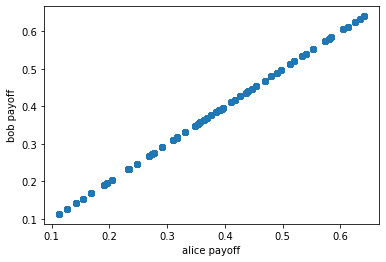

In [15]:
a, b = zip(*pffs)
plt.scatter(a,b)
plt.xlabel('alice payoff')
plt.ylabel('bob payoff')

#### varying both

In [16]:
t = np.linspace(0, np.pi/2, 5)

pffs  = []

for j, k, l, m in it.product(t,t,t,t):
    pffs.append(Fq(S, px, S, qpyx, u, [(0 + j, np.pi/4 + k), (np.pi/8 + l, -np.pi/8 + m)]))
    pffs.append(Fq(S, px, S, qpyx, u, [(0 - j, np.pi/4 - k), (np.pi/8 - l, -np.pi/8 - m)]))

Text(0, 0.5, 'bob payoff')

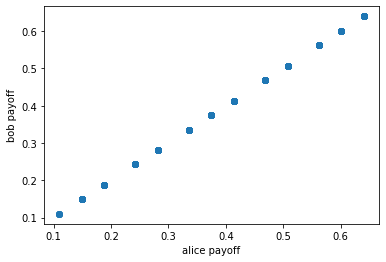

In [17]:
a, b = zip(*pffs)
plt.scatter(a,b)
plt.xlabel('alice payoff')
plt.ylabel('bob payoff')

What the heck?

### so fails to reproduce their plot
reasons:
1. May be there is a bug i cant find
2. May be I didnt get the idea of what they did to plot it

##### So if only its right, this plot says both players get the same payoff when they both vary their strategies differently. So whats the point of this paper emphasising on conflicting interest and players ending up getting fair payoffs in the quantum case when the strategies are varied. I need to figure it out. 

## So lets try out different utility funtions

In [18]:
def ut2(x,y):
    x1, x2, y1, y2 = x[0], x[1], y[0], y[1]
    t = x1&x2
    if t == y1^y2:
        return{0:(1, 1/2), 1:(1/2,1)}[y1] if t == 0 else {0:(3/4, 1/2), 1:(1/2,1)}[y1]
    else:
        return (0,0)

In [19]:
prpff(ut2)

y      :  payoff

 x1^x2 = 0
(0, 0) : (1, 0.5)
(0, 1) : (0, 0)
(1, 0) : (0, 0)
(1, 1) : (0.5, 1)

 x1^x2 = 0
(0, 0) : (1, 0.5)
(0, 1) : (0, 0)
(1, 0) : (0, 0)
(1, 1) : (0.5, 1)

 x1^x2 = 0
(0, 0) : (1, 0.5)
(0, 1) : (0, 0)
(1, 0) : (0, 0)
(1, 1) : (0.5, 1)

 x1^x2 = 1
(0, 0) : (0, 0)
(0, 1) : (0.75, 0.5)
(1, 0) : (0.5, 1)
(1, 1) : (0, 0)


In [20]:
def pplot(u):
    t = np.linspace(0, np.pi/2, 5)

    pffs  = []

    for j, k, l, m in it.product(t,t,t,t):
        pffs.append(Fq(S, px, S, qpyx, u, [(0 + j, np.pi/4 + k), (np.pi/8 + l, -np.pi/8 + m)]))
        pffs.append(Fq(S, px, S, qpyx, u, [(0 - j, np.pi/4 - k), (np.pi/8 - l, -np.pi/8 - m)]))
        
    a, b = zip(*pffs)
    plt.scatter(a,b)
    plt.xlabel('alice payoff')
    plt.ylabel('bob payoff')

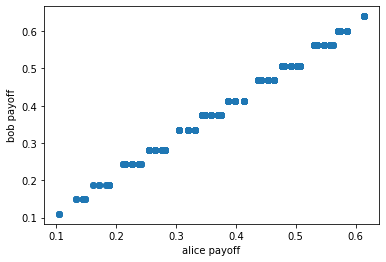

In [21]:
pplot(ut2)

emmm...

In [231]:
def ut3(x,y):
    x1, x2, y1, y2 = x[0], x[1], y[0], y[1]
    t = x1^x2
    if t == y1&y2:
        return{0:(1, 1/2), 1:(1/2,1)}[y1] if t == 0 else {0:(3/4, 1/2), 1:(1/2,1)}[y1]
    else:
        return (0.5,0)

y      :  payoff

 x1^x2 = 0
(0, 0) : (1, 0.5)
(0, 1) : (1, 0.5)
(1, 0) : (0.5, 1)
(1, 1) : (0.5, 0)

 x1^x2 = 0
(0, 0) : (0.5, 0)
(0, 1) : (0.5, 0)
(1, 0) : (0.5, 0)
(1, 1) : (0.5, 1)

 x1^x2 = 0
(0, 0) : (0.5, 0)
(0, 1) : (0.5, 0)
(1, 0) : (0.5, 0)
(1, 1) : (0.5, 1)

 x1^x2 = 1
(0, 0) : (1, 0.5)
(0, 1) : (1, 0.5)
(1, 0) : (0.5, 1)
(1, 1) : (0.5, 0)


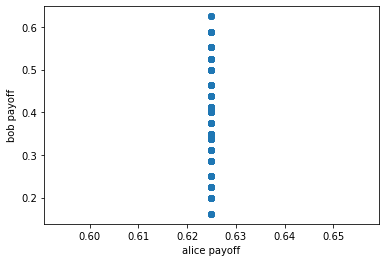

In [232]:
prpff(ut3)
pplot(ut3)

hehe

In [251]:
def ut4(x,y):
    x1, x2, y1, y2 = x[0], x[1], y[0], y[1]
    t = x1|x2
    if t == y1^y2:
        return{0:(1, 1/2), 1:(1/2,1)}[y1] if t == 1 else {0:(0, 1/2), 1:(1/2,0)}[y1]
    else:
        return (1/2,3/4)

y      :  payoff

 x1^x2 = 0
(0, 0) : (0, 0.5)
(0, 1) : (0.5, 0.75)
(1, 0) : (0.5, 0.75)
(1, 1) : (0.5, 0)

 x1^x2 = 0
(0, 0) : (0.5, 0.75)
(0, 1) : (1, 0.5)
(1, 0) : (0.5, 1)
(1, 1) : (0.5, 0.75)

 x1^x2 = 0
(0, 0) : (0.5, 0.75)
(0, 1) : (1, 0.5)
(1, 0) : (0.5, 1)
(1, 1) : (0.5, 0.75)

 x1^x2 = 1
(0, 0) : (0.5, 0.75)
(0, 1) : (1, 0.5)
(1, 0) : (0.5, 1)
(1, 1) : (0.5, 0.75)


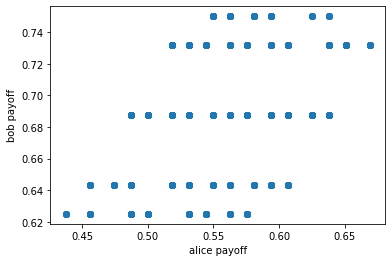

In [252]:
prpff(ut4)
pplot(ut4)

ohk thats it for now

In [174]:
def ut1(x,y):
    x1, x2, y1, y2 = x[0], x[1], y[0], y[1]
    t = x1&x2
    if t == y1^y2:
        return{0:(1, 1), 1:(1,1)}[y1] if t == 0 else (1, 1)
    else:
        return (0,0)

# Critisms

**Only incase i'm right, but i'm sure i'm wrong :P**

1. Feels like this paper just slightly tweaked the already well established CHSH game and uses the smae winning strategy, at the same time claiming a stark contrast emphasising by conflicting interest. 
2. Battle of sex payoff structure just happened to be slightly different to the common interest CHSH for which the adventage could be shown with the same experintal setup of already prior established CSHS advantage. 

# Extra tryouts

## Any significance of Phase?

### lets try entangled state and orthormal basis with complex amplitudes

In [272]:

cphi = lambda y, t: np.cos(t)*k0 + 1j*np.sin(t)*k1 if y ==0 else -np.sin(t)*k0 + 1j*np.cos(t)*k1

cP = lambda y, t: np.outer(cphi(y, t), np.conj(cphi(y, t)))
# Phip = 1/2**0.5*(np.kron(k0,k0) + 1jnp.kron(k1,k1))


In [273]:
def Fq(X, px, Y, pyx, u, th):
    f1, f2 = 0, 0
    for x in X:
        i = x[1]*1 + x[0]*2
        for y in Y:
            f1 += px[i]*pyx(x,y, th)*u(x, y)[0]
            f2 += px[i]*pyx(x,y, th)*u(x, y)[1]
    return f1,f2

In [274]:
theta = [(0, np.pi/4), (np.pi/8, -np.pi/8)]
def qpyx1(x, y, t = theta):
    x1, x2, y1, y2 = x[0], x[1], y[0], y[1]
    
    psi = 1/2**0.5*(np.kron(k0,k0) + 1j*np.kron(k1,k1))
    
    return ex(np.kron(cP(y1, t[0][x1]), cP(y2, t[1][x2])), psi)

In [275]:
print('Payoff of (alice, bob) =',Fq(S, px, S, qpyx1, u, theta))

Payoff of (alice, bob) = ((0.5075825214724776+0j), (0.5075825214724776+0j))


In [276]:
t = np.linspace(0, np.pi/2, 5)

pffs  = []

for j, k, l, m in it.product(t,t,t,t):
    pffs.append(Fq(S, px, S, qpyx1, u, [(0 + j, np.pi/4 + k), (np.pi/8 + l, -np.pi/8 + m)]))
    pffs.append(Fq(S, px, S, qpyx1, u, [(0 - j, np.pi/4 - k), (np.pi/8 - l, -np.pi/8 - m)]))

/home/vambala/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0, 0.5, 'bob payoff')

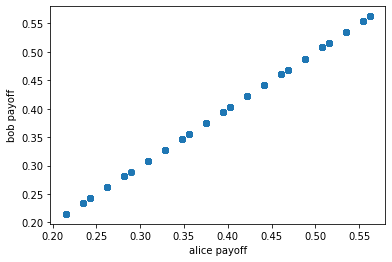

In [277]:
a, b = zip(*pffs)
plt.scatter(a,b)
plt.xlabel('alice payoff')
plt.ylabel('bob payoff')

#### Ok, nothing special for now

# rough

In [120]:
for x in S:
    i = x[1]*1 + x[0]*2
    for y in S:
        print(qpyx(x, y))  

0.4267766952966368
0.0732233047033631
0.0732233047033631
0.4267766952966368
0.4267766952966368
0.0732233047033631
0.0732233047033631
0.4267766952966368
0.42677669529663687
0.07322330470336304
0.07322330470336304
0.42677669529663687
0.07322330470336313
0.42677669529663675
0.42677669529663675
0.07322330470336313


In [264]:
np.dot(np.conj(cphi(0, np.pi/4)), cphi(1, np.pi/4))

0j

In [102]:
phi(1, np.pi/4)

array([-0.70710678,  0.70710678])

In [104]:
P(1, np.pi/4)

array([[ 0.5, -0.5],
       [-0.5,  0.5]])

In [128]:
np.trace(np.dot(P(0, 0),P(0, np.pi/8)))/2

0.42677669529663687

In [126]:
np.cos(np.pi/8)**2/2

0.42677669529663687

In [106]:
np.kron(k0,k0)

array([1, 0, 0, 0])

In [116]:
np.dot(k1, np.dot(P(1, np.pi/4),k1))

0.5000000000000001

In [117]:
ex(k1,P(1, np.pi/4))

array([-0.5,  0.5])

In [47]:
S[0][1]&0

0

In [38]:
for i,j in it.product([0,1],[0,1]):
    print(i,j, ':', i&j^i)

0 0 : 0
0 1 : 0
1 0 : 1
1 1 : 0


In [13]:
list(it.product([0,1],[0,1]))

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [19]:
a = np.array([0,1])
np.meshgrid(a,a)

[array([[0, 1],
        [0, 1]]),
 array([[0, 0],
        [1, 1]])]

UsageError: Line magic function `%1` not found.


In [59]:
def u(x,y):
    x1, x2, y1, y2 = x[0], x[1], y[0], y[1]
    t = x1&x2
    if t == y1^y2:
        return (1,1/2) if y1|t == 0 else (1/2 + 1/4*int(t^y1|t), 1 - 1/4*int(t^y1|t)) 
    else:
        return (0,0)

In [182]:
import numpy.typing as npt


def generateConvex(n: int) -> npt.NDArray[np.float64]:
    '''
    Generate convex shappes according to Pavel Valtr's 1995 alogrithm. Ported from
    Sander Verdonschot's Java version, found here:
    https://cglab.ca/~sander/misc/ConvexGeneration/ValtrAlgorithm.java
    '''
    # initialise random coordinates
    X_rand, Y_rand = np.sort(np.random.random(n)), np.sort(np.random.random(n))
    X_new, Y_new = np.zeros(n), np.zeros(n)

    # divide the interior points into two chains
    last_true = last_false = 0
    for i in range(1, n):
        if i != n - 1:
            if random.getrandbits(1):
                X_new[i] = X_rand[i] - X_rand[last_true]
                Y_new[i] = Y_rand[i] - Y_rand[last_true]
                last_true = i
            else:
                X_new[i] = X_rand[last_false] - X_rand[i]
                Y_new[i] = Y_rand[last_false] - Y_rand[i]
                last_false = i
        else:
            X_new[0] = X_rand[i] - X_rand[last_true]
            Y_new[0] = Y_rand[i] - Y_rand[last_true]
            X_new[i] = X_rand[last_false] - X_rand[i]
            Y_new[i] = Y_rand[last_false] - Y_rand[i]

    # randomly combine x and y and sort by polar angle
    np.random.shuffle(Y_new)
    vertices = np.stack((X_new, Y_new), axis=-1)
    vertices = vertices[np.argsort(np.arctan2(vertices[:, 1], vertices[:, 0]))]

    # arrange points end to end to form a polygon
    vertices = np.cumsum(vertices, axis=0)

    # center around the origin
    x_max, y_max = np.max(vertices[:, 0]), np.max(vertices[:, 1])
    vertices[:, 0] += ((x_max - np.min(vertices[:, 0])) / 2) - x_max
    vertices[:, 1] += ((y_max - np.min(vertices[:, 1])) / 2) - y_max

    return vertices

ModuleNotFoundError: No module named 'numpy.typing'

In [183]:
import random
from math import atan2


def to_convex_contour(vertices_count,
                      x_generator=random.random,
                      y_generator=random.random):
    """
    Port of Valtr algorithm by Sander Verdonschot.

    Reference:
        http://cglab.ca/~sander/misc/ConvexGeneration/ValtrAlgorithm.java

    >>> contour = to_convex_contour(20)
    >>> len(contour) == 20
    True
    """
    xs = [x_generator() for _ in range(vertices_count)]
    ys = [y_generator() for _ in range(vertices_count)]
    xs = sorted(xs)
    ys = sorted(ys)
    min_x, *xs, max_x = xs
    min_y, *ys, max_y = ys
    vectors_xs = _to_vectors_coordinates(xs, min_x, max_x)
    vectors_ys = _to_vectors_coordinates(ys, min_y, max_y)
    random.shuffle(vectors_ys)

    def to_vector_angle(vector):
        x, y = vector
        return atan2(y, x)

    vectors = sorted(zip(vectors_xs, vectors_ys),
                     key=to_vector_angle)
    point_x = point_y = 0
    min_polygon_x = min_polygon_y = 0
    points = []
    for vector_x, vector_y in vectors:
        points.append((point_x, point_y))
        point_x += vector_x
        point_y += vector_y
        min_polygon_x = min(min_polygon_x, point_x)
        min_polygon_y = min(min_polygon_y, point_y)
    shift_x, shift_y = min_x - min_polygon_x, min_y - min_polygon_y
    return [(point_x + shift_x, point_y + shift_y)
            for point_x, point_y in points]


def _to_vectors_coordinates(coordinates, min_coordinate, max_coordinate):
    last_min = last_max = min_coordinate
    result = []
    for coordinate in coordinates:
        if _to_random_boolean():
            result.append(coordinate - last_min)
            last_min = coordinate
        else:
            result.append(last_max - coordinate)
            last_max = coordinate
    result.extend((max_coordinate - last_min,
                   last_max - max_coordinate))
    return result


def _to_random_boolean():
    return random.getrandbits(1)

In [187]:
to_convex_contour(2)

[(0.7632372120178594, 0.9612072403155246),
 (0.29180065042137693, 0.7820159284485971)]

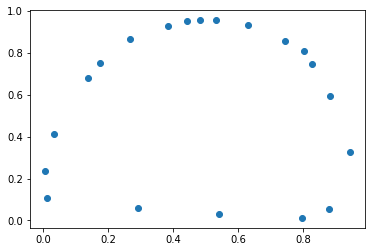

In [198]:
x, y =  zip(*to_convex_contour(20))
plt.scatter(x,y)

In [ ]:
1